# The Sparks Foundation - GRIP 
### Data Science and business Analytics
### Task 1: Prediction using Supervised ML
### Arti Gupta

## Description of a Dataset¶:
This dataset contain 2 columns and 25 rows and this dataset contain attributes such as Hours,Scores. I am going to analyze the data deeply and try to get some useful insights.
It includes 2 variables.These variables are described below:
 
1. Hours: Represents the number of hours studied by individuals.
2. Score: Represents the scores obtained by individuals.

## Goal of the Project:
In this projet, I am going to develp a machine learning model for predicting scores corresponding to their performance after studying for the number of hours.
    

## Tools used

1. pandas for data manipulation
2. numpy is mostly used for working in numerical values
3. Seaborn and matplotlib  for visualization graph.
4. Sklearn for training and testing data

In [104]:
import pandas as pd
import numpy as np

## Load dataset

In [105]:
df=pd.read_csv("student_scores.csv")

In [106]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Preprocessing

In [107]:
df.shape

(25, 2)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


This shows that both columns have 25 non-null entries, the dataset is complete with no missing values. Hours indicates that the values are float and Scores indicates that the values are integers.

In [109]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

It shows that there are no null values.

In [110]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The given statistics provide a summary of the distribution of the "Hours" and "Scores" columns in the dataset:
1. The data shows a range of study hours from 1.1 to 9.2 hours, with most individuals studying between 2.7 and 7.4 hours.
2. Scores range from 17 to 95, with a significant spread, indicating a wide range of performance among individuals.
3. The mean  of hours is 5.012 and the mean of score is 51.48 suggest a potential positive relationship.

## Exploratory Data Analysis

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

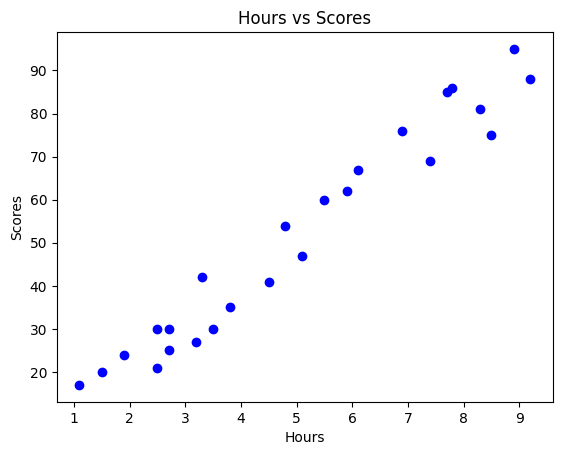

In [112]:
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Train and test data splitting

In [113]:
x=df.drop("Scores",axis=1)
y=df["Scores"]

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [116]:
print("x_train\n\n",x_train)
print("\nx_test\n\n",x_test)
print("\ny_train\n\n",y_train)
print("\ny_test\n\n",y_test)


x_train

     Hours
22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5

x_test

     Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9

y_train

 22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

y_test

 5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


## Linear Regression model:
A linear regression model is a statistical method used to model the relationship between a dependent variable and one or more independent variables. This method aims to find the best-fitting linear equation that predicts the dependent variable based on the values of the independent variables.

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
reg=LinearRegression()

In [119]:
reg.fit(x_train,y_train)

LinearRegression()

In [120]:
y_pred=reg.predict(x_test)

Let's analyze the given actual and predicted values for scores based on a linear regression model:

In [121]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [122]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,root_mean_squared_error

In [123]:
print("r2: ",r2_score(y_pred,y_test))
print("mse: ",mean_squared_error(y_pred,y_test))
print("mae: ",mean_absolute_error(y_pred,y_test))
print("rmse: ",root_mean_squared_error(y_pred,y_test))

r2:  0.9546785947197246
mse:  21.5987693072174
mae:  4.183859899002975
rmse:  4.6474476121003665


1. The average absolute difference between the actual and predicted scores is about 4.18 points.
2. The average squared difference between the actual and predicted scores is 21.60.
3. The standard deviation of the residuals (prediction errors) is approximately 4.65.
4. The model explains about 95% of the variance in the actual scores, indicating a very good fit.

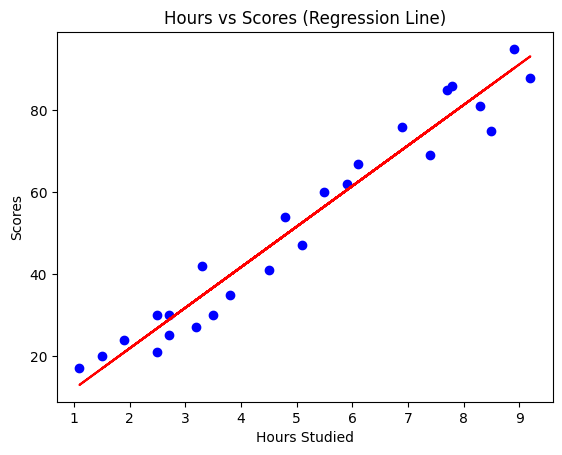

In [124]:
plt.scatter(x, y, color='blue')
plt.plot(x, reg.predict(x), color='red')
plt.title('Hours vs Scores (Regression Line)')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()



This scatter plot indicates a positive correlation between hours studied and scores.
This red line is the best-fit line that minimizes the sum of the squared differences between the actual scores and the predicted scores.

#### Q. What will be the predicted score if a student studies for 9.25hrs/day?

In [128]:
Hours=[9.25]

In [129]:
Scores=reg.predict([x])
Scores

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93.69173249])

#### Ans. If a student studies 9.25 hrs per day then they get 93 scores.